# Multiclass Classification

### Import data

In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
print("Length of train data:", len(train_data))
print("Length of test data:", len(test_data))

Length of train data: 8982
Length of test data: 2246


In [3]:
## Take a look at our data

# Print an encoded comment
print("11th newswire (encoded):", train_data[10], sep='\n', end='\n\n') 

# Print a decoded comment
word_index = reuters.get_word_index() 
reverse_word_index = dict([(v, k) for (k, v) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[10]]) # Remark 1
print("11th newswire (decoded):", decoded_newswire, sep='\n')


# Remark 1: Indices are offset by 3 because 0, 1, and 2 are reserved indices for "padding", "start of sequence", and "unknown".
# - The first `?` is translated from a 1, the start token; 
# - The `?` between `jane` and `satirical` corresponds to a 2, an unknown word (not one of the most 10,000 frequently occurred words).

11th newswire (encoded):
[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]

11th newswire (decoded):
? period ended december 31 shr profit 11 cts vs loss 24 cts net profit 224 271 vs loss 511 349 revs 7 258 688 vs 7 200 349 reuter 3


### Preparing the data

In [4]:
import numpy as np

def onehot_encode(seq, dim=10000):
    results = np.zeros((len(seq), dim))
    for i, seq in enumerate(seq):
        results[i, seq] = 1
    return results

x_train = onehot_encode(train_data)
x_test = onehot_encode(test_data)

In [5]:
def onehot_label(labels, dim=46):
    results = np.zeros((len(labels), dim))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

y_train = onehot_label(train_labels)
y_test = onehot_label(test_labels)

In [6]:
# As a remark, Keras has a built-in `to_categorical` function:

# from keras.utils.np_utils import to_categorical
# y_train = to_categorical(train_labels)
# y_test = to_categorical(test_labels)

In [7]:
# There is another way to encode the labels -- cast them as an integer tensor.

# y_train = np.array(train_labels)
# y_test = np.array(test_labels)

# The difference is instead of categorical_crossentropy, we would use sparse_categorical_crossentropy,
# which is basically the same thing but with a different interface.

# model.compile(
#     optimizer='rmsprop',
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

### Construct the model

In [8]:
from keras import models, layers

"""
Input   : (10000,) 
    Layer 1 : (10000 => 64) | relu
    Layer 2 : (64    => 64) | relu
    Layer 3 : (64    => 46) | softmax
Result  : (1,)
"""

model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,))) # 
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### Train the model

In [9]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [10]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
    verbose=2
)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
 - 2s - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
 - 1s - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
 - 1s - loss: 1.0953 - acc: 0.7653 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
 - 1s - loss: 0.8697 - acc: 0.8161 - val_loss: 1.0796 - val_acc: 0.7590
Epoch 5/20
 - 1s - loss: 0.7033 - acc: 0.8474 - val_loss: 0.9849 - val_acc: 0.7830
Epoch 6/20
 - 1s - loss: 0.5666 - acc: 0.8799 - val_loss: 0.9416 - val_acc: 0.8040
Epoch 7/20
 - 1s - loss: 0.4583 - acc: 0.9048 - val_loss: 0.9075 - val_acc: 0.8010
Epoch 8/20
 - 1s - loss: 0.3695 - acc: 0.9227 - val_loss: 0.9354 - val_acc: 0.7900
Epoch 9/20
 - 1s - loss: 0.3032 - acc: 0.9308 - val_loss: 0.8907 - val_acc: 0.8090
Epoch 10/20
 - 1s - loss: 0.2539 - acc: 0.9416 - val_loss: 0.9059 - val_acc: 0.8110
Epoch 11/20
 - 1s - loss: 0.2187 - acc: 0.9466 - val_loss: 0.9190 - val_acc: 0.8120
Epoch 12/20
 - 1s - loss: 0.1877 - ac

### Visualize the result

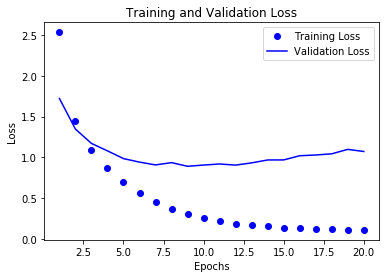

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

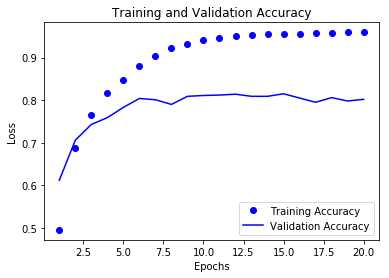

In [12]:
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']


plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Make predictions

In [13]:
model.predict(x_test)

array([[9.9316424e-07, 8.1163427e-07, 6.2383338e-09, ..., 3.5295398e-09,
        9.2329766e-10, 7.2091061e-10],
       [6.0484943e-04, 7.2021629e-03, 1.0811546e-06, ..., 2.1641977e-08,
        2.9440286e-09, 1.3876562e-05],
       [1.8025754e-02, 8.9359778e-01, 5.1821070e-04, ..., 7.9983220e-06,
        2.7950518e-06, 3.2748114e-05],
       ...,
       [2.6147438e-07, 1.2033041e-06, 6.4066427e-08, ..., 2.5754656e-09,
        1.2672969e-08, 1.3376104e-09],
       [2.6473692e-03, 1.4295767e-01, 3.6669633e-04, ..., 3.5683152e-05,
        1.4238781e-06, 2.2964355e-06],
       [5.7424870e-05, 7.2784001e-01, 2.0899089e-02, ..., 2.2410036e-07,
        2.1033033e-09, 1.2342776e-06]], dtype=float32)